# Model creation and accuracy caheck for the Design-1 data 

In [193]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [177]:
df = pd . read_csv(("D:\BreakPads_ML\Raw_Input_Data\Design1.csv"))
df = df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"])
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
df.head()   

,1,2,3,4,5,6,7,8,9,10,...,881,882,883,Design,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,2.57188,2.30037,2.46050,2.65304,2.81205,2.75852,2.66240,2.46821,2.30057,2.56229,...,1.72637,1.72359,1.81010,Design_1,7.5,29.3,86.8,15,100,50.0
1,3.16330,2.76536,2.94005,3.17009,3.36315,3.29799,3.18142,2.94898,2.76447,3.15023,...,2.06827,2.06496,2.16817,Design_1,7.5,29.3,86.8,15,100,60.0
2,3.76559,3.22990,3.41703,3.68470,3.91224,3.83530,3.69804,3.42718,3.22778,3.74881,...,2.40960,2.40582,2.52562,Design_1,7.5,29.3,86.8,15,100,70.0
3,4.37665,3.69413,3.89217,4.19759,4.45998,4.37113,4.21299,3.90353,3.69071,4.35597,...,2.75046,2.74624,2.88259,Design_1,7.5,29.3,86.8,15,100,80.0
4,4.99506,4.15829,4.36606,4.70939,5.00690,4.90605,4.72688,4.37863,4.15347,4.97035,...,3.09081,3.08615,3.23906,Design_1,7.5,29.3,86.8,15,100,90.0


In [28]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '881', '882', '883', 'Design', 'Pad_Thickness', 'Pad_Height',
       'Pad_Width', 'Pis_Radius', 'Youngs_Modulus', 'Applied_Pressure'],
      dtype='object', length=890)

In [178]:
x_features = df.iloc[:,884:]
print(x_features.dtypes)
x_features.head(12)

Pad_Thickness       float64
Pad_Height          float64
Pad_Width           float64
Pis_Radius            int64
Youngs_Modulus        int64
Applied_Pressure    float64
dtype: object


,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,7.5,29.3,86.8,15,100,50.0
1,7.5,29.3,86.8,15,100,60.0
2,7.5,29.3,86.8,15,100,70.0
3,7.5,29.3,86.8,15,100,80.0
4,7.5,29.3,86.8,15,100,90.0
5,7.5,29.3,86.8,15,100,100.0
6,7.5,29.3,86.8,15,200,50.0
7,7.5,29.3,86.8,15,200,60.0
8,7.5,29.3,86.8,15,200,70.0
9,7.5,29.3,86.8,15,200,80.0


In [179]:
y_targets = df.iloc[:,:883]
print(y_targets.dtypes.value_counts())
y_targets.head(12)

float64    883
dtype: int64


,1,2,3,4,5,6,7,8,9,10,...,874,875,876,877,878,879,880,881,882,883
0,2.57188,2.30037,2.46050,2.65304,2.81205,2.75852,2.66240,2.46821,2.30057,2.56229,...,1.50749,2.73289,2.79201,2.81998,2.84751,1.68822,1.71832,1.72637,1.72359,1.81010
1,3.16330,2.76536,2.94005,3.17009,3.36315,3.29799,3.18142,2.94898,2.76447,3.15023,...,1.80557,3.26674,3.33872,3.37299,3.40595,2.02178,2.05845,2.06827,2.06496,2.16817
2,3.76559,3.22990,3.41703,3.68470,3.91224,3.83530,3.69804,3.42718,3.22778,3.74881,...,2.10329,3.79833,3.88338,3.92407,3.96245,2.35454,2.39795,2.40960,2.40582,2.52562
3,4.37665,3.69413,3.89217,4.19759,4.45998,4.37113,4.21299,3.90353,3.69071,4.35597,...,2.40061,4.32837,4.42663,4.47384,4.51763,2.68667,2.73693,2.75046,2.74624,2.88259
4,4.99506,4.15829,4.36606,4.70939,5.00690,4.90605,4.72688,4.37863,4.15347,4.97035,...,2.69747,4.85745,4.96905,5.02284,5.07203,3.01819,3.07538,3.09081,3.08615,3.23906
5,5.61985,4.62255,4.83915,5.22057,5.55343,5.44051,5.24016,4.85294,4.61629,5.59098,...,2.99385,5.38601,5.51105,5.57149,5.62607,3.34911,3.41328,3.43062,3.42558,3.59505
6,2.65202,2.54718,2.76803,2.97825,3.13486,3.08425,2.98815,2.77764,2.55089,2.64618,...,1.35103,3.05956,3.11661,3.14130,3.16747,1.58752,1.62168,1.63136,1.62869,1.74575
7,3.25967,3.06382,3.30984,3.56011,3.74927,3.68794,3.57195,3.32090,3.06698,3.25105,...,1.62127,3.65805,3.72715,3.75722,3.78834,1.90539,1.94637,1.95785,1.95445,2.09389
8,3.88157,3.58048,3.84839,4.13858,4.36081,4.28855,4.15239,3.86086,3.58289,3.86988,...,1.89178,4.25334,4.33472,4.37033,4.40642,2.22282,2.27077,2.28409,2.28002,2.44158
9,4.51531,4.09698,4.38413,4.71420,4.96994,4.88658,4.73002,4.39798,4.09846,4.50030,...,2.16244,4.84595,4.93981,4.98110,5.02215,2.53978,2.59480,2.61000,2.60530,2.78878


In [31]:
print(x_features.shape,y_targets.shape)

(150, 6) (150, 883)


## Model Building with mutiple target

## Multi Output Regressor 

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn import metrics

In [196]:
x_test, x_train, y_test, y_train = train_test_split(x_features, y_targets, test_size = 0.3, random_state = 100)

In [ ]:
Kfold_val = KFold(n_splits=10, shuffle=True, random_state=50)

In [183]:
Model_1 = MultiOutputRegressor ( RidgeCV ( cv = Kfold_val ) )

In [40]:
Model_1.fit(x_train, y_train)
print('Model_1 train score = ', Model_1.score(x_train, y_train))
print('Model_1 test score = ', Model_1.score(x_test, y_test))

Model_1 train score =  0.850587427449724
Model_1 test score =  0.7726530872744862


### 1. Linear Regressor

In [41]:
Model_2 = LinearRegression().fit(x_train, y_train)
print('Model_2 train score = ', Model_2.score(x_train, y_train))
print('Model_2 test score = ', Model_2.score(x_test, y_test)) 

Model_2 train score =  0.858801319505813
Model_2 test score =  0.7778691996624865


In [64]:
y_predts_M2 = pd.DataFrame(Model_2.predict(x_test))
metrics.mean_squared_error(y_test, y_predts_M2)

0.09438833964286178

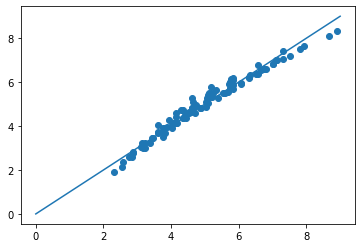

In [74]:
plt.scatter(y_test.iloc[:,1], y_predts_M2.iloc[:,1])
plt.plot(range(10), range(10))

### 2. Decision Tree Regressor

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [93]:
DT_reg_1 = DecisionTreeRegressor(max_depth=1); DT_reg_1.fit(x_train, y_train)
DT_reg_2 = DecisionTreeRegressor(max_depth=3); DT_reg_2.fit(x_train, y_train)
DT_reg_3 = DecisionTreeRegressor(max_depth=6); DT_reg_3.fit(x_train, y_train)
DT_reg_4 = DecisionTreeRegressor(max_depth=8); DT_reg_4.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [104]:
y_DT_predts_1 = DT_reg_1.predict(x_test)
y_DT_predts_2 = DT_reg_2.predict(x_test)
y_DT_predts_3 = DT_reg_3.predict(x_test)
y_DT_predts_4 = DT_reg_4.predict(x_test)


In [105]:
# max depth = 1
print('Train score at max depth 1 = ', DT_reg_1.score(x_train, y_train))
print('Test score at max depth 1 = ', DT_reg_1.score(x_test, y_test))

Train score at max depth 1 =  0.3219041534851385
Test score at max depth 1 =  0.23261708790928165


In [106]:
# max depth = 3
print('Train score at max depth 3 = ', DT_reg_2.score(x_train, y_train))
print('Test score at max depth 3 = ', DT_reg_2.score(x_test, y_test))

Train score at max depth 3 =  0.726693702553705
Test score at max depth 3 =  0.5518176004972888


In [107]:
# max depth = 6
print('Train score at max depth 6 = ', DT_reg_3.score(x_train, y_train))
print('Test score at max depth 6 = ', DT_reg_3.score(x_test, y_test))

Train score at max depth 6 =  0.9759309630303897
Test score at max depth 6 =  0.6374232086499092


In [108]:
# max depth = 9
print('Train score at max depth 8 = ', DT_reg_4.score(x_train, y_train))
print('Test score at max depth 8 = ', DT_reg_4.score(x_test, y_test))

Train score at max depth 8 =  0.9999447419892095
Test score at max depth 8 =  0.6535339789493892


In [114]:
print (metrics.mean_squared_error(y_test, y_DT_predts_1),' is the mean squared error when max_dpt is 1')
print (metrics.mean_squared_error(y_test, y_DT_predts_2),' is the mean squared error when max_dpt is 3')
print (metrics.mean_squared_error(y_test, y_DT_predts_3),' is the mean squared error when max_dpt is 6')
print (metrics.mean_squared_error(y_test, y_DT_predts_4),' is the mean squared error when max_dpt is 8')

1.0833683809947683  is the mean squared error when max_dpt is 1
0.4652008148767801  is the mean squared error when max_dpt is 3
0.3100185583089285  is the mean squared error when max_dpt is 6
0.28296017098645426  is the mean squared error when max_dpt is 8


### 3. Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
#Multioutput regressor with random forest
max_depth = 25
MOR_RF_3_1 = MultiOutputRegressor(RandomForestRegressor(n_estimators=50,max_depth=max_depth,random_state=50))

In [137]:
MOR_RF_3_1.fit(x_train, y_train)
print(MOR_RF_3_1.score(x_train, y_train),'is the train score of MultiOutput Random Forest Regressor')
print(MOR_RF_3_1.score(x_test, y_test),'is the test score of MultiOutput Random Forest Regressor')

0.9637644606033223 is the train score of MultiOutput Random Forest Regressor
0.7927763698279613 is the test score of MultiOutput Random Forest Regressor


In [139]:
MOR_DF_Predts = MOR_RF_3_1.predict(x_test)
metrics.mean_squared_error(y_test, MOR_DF_Predts)

0.1178248407307666

#### 3.1 Only Random Forest

In [141]:
RF_3_2 = RandomForestRegressor(n_estimators=50, max_depth=max_depth, random_state=100)

In [143]:
RF_3_2.fit(x_train, y_train)
print(RF_3_2.score(x_train, y_train),'is the train score of Random Forest Regressor')
print(RF_3_2.score(x_test, y_test),'is the test score of Random Forest Regressor')

0.9709117830191277 is the train score of Random Forest Regressor
0.7119276947023673 is the test score of Random Forest Regressor


In [147]:
RF_predts = RF_3_2.predict(x_test)
metrics.mean_squared_error(y_test, RF_predts)

0.17836696538723928

#### 3.1 Regressor chain

In [145]:
from sklearn.multioutput import RegressorChain
RC_RF_3_3 = RegressorChain(RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=100))
RC_RF_3_3.fit(x_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=25,
                                                    n_estimators=10,
                                                    random_state=100))

In [146]:
print(RC_RF_3_3.score(x_train, y_train),'is the train score of Regressor Chain Random Forest Regressor')
print(RC_RF_3_3.score(x_test, y_test),'is the test score of  Regressor Chain Random Forest Regressor')

0.7090609981699522 is the train score of Regressor Chain Random Forest Regressor
0.5432945279780171 is the test score of  Regressor Chain Random Forest Regressor


In [148]:
RC_RF_predts = RC_RF_3_3.predict(x_test)
print(metrics.mean_squared_error(y_test, RC_RF_predts))

0.42987475627101457


### 4. SVM

In [149]:
from sklearn.svm import SVR

In [164]:
# Create the SVR regressor
svr_1 = SVR()
svr_2 = SVR(epsilon=0.2)
svr_3 = SVR(epsilon=0.3)
# Create the Multioutput Regressor
MOR_SVR_1 = MultiOutputRegressor(svr_1)
MOR_SVR_2 = MultiOutputRegressor(svr_2)
MOR_SVR_3 = MultiOutputRegressor(svr_3)

In [166]:
# Train the regressor
MOR_SVR_1.fit(x_train, y_train)
MOR_SVR_2.fit(x_train, y_train)
MOR_SVR_3.fit(x_train, y_train)

# Generate predictions for testing data
MOR_SVR_predts_1 = MOR_SVR_1.predict(x_test)
MOR_SVR_predts_2 = MOR_SVR_2.predict(x_test)
MOR_SVR_predts_3 = MOR_SVR_3.predict(x_test)


In [167]:
# dcores for epsilon 0.2
print(MOR_SVR_1.score(x_train, y_train),'is the train score of Regressor Chain Random Forest Regressor')
print(MOR_SVR_1.score(x_test, y_test),'is the test score of  Regressor Chain Random Forest Regressor')
print('mean squared error = ',metrics.mean_squared_error(y_test, MOR_SVR_predts_1))

-0.2898249564228948 is the train score of Regressor Chain Random Forest Regressor
0.07323933667249993 is the test score of  Regressor Chain Random Forest Regressor
mean squared error =  1.5065529095114412


In [168]:
# dcores for epsilon 0.4
print(MOR_SVR_2.score(x_train, y_train),'is the train score of Regressor Chain Random Forest Regressor')
print(MOR_SVR_2.score(x_test, y_test),'is the test score of  Regressor Chain Random Forest Regressor')
print('mean squared error = ',metrics.mean_squared_error(y_test, MOR_SVR_predts_2))

-0.45223565167821933 is the train score of Regressor Chain Random Forest Regressor
0.08530211167163138 is the test score of  Regressor Chain Random Forest Regressor
mean squared error =  1.4893025938768407


In [169]:
# dcores for epsilon 0.6
print(MOR_SVR_3.score(x_train, y_train),'is the train score of Regressor Chain Random Forest Regressor')
print(MOR_SVR_3.score(x_test, y_test),'is the test score of  Regressor Chain Random Forest Regressor')
print('mean squared error = ',metrics.mean_squared_error(y_test, MOR_SVR_predts_3))

-0.6152392537048285 is the train score of Regressor Chain Random Forest Regressor
0.0932936445841569 is the test score of  Regressor Chain Random Forest Regressor
mean squared error =  1.4606597601653273


### 5. XG Boost

In [197]:
import xgboost as xgb

In [198]:
XGB_1 = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:squarederror'))
XGB_2 = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:linear'))

XGB_1.fit(x_train, y_train); XGB_2.fit(x_train, y_train)

[18:04:45] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:45] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:45] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:46] WARNING: d:\bld\xgboost-split_1645118015404\work\src\

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
     

In [199]:
Xgb_predts_1 = XGB_1.predict(x_test)
Xgb_predts_2 = XGB_2.predict(x_test)

In [194]:
# dcores for squared error objective
print(XGB_1.score(x_train, y_train),'is the train score of XGboost Regressor')
print(XGB_1.score(x_test, y_test),'is the test score of  XGboost Regressor')
print('mean squared error = ',metrics.mean_squared_error(y_test, Xgb_predts_1))

0.9221533847429176 is the train score of XGboost Regressor
0.7527349862244936 is the test score of  XGboost Regressor
mean squared error =  0.08254907243653542


In [195]:
# dcores for linear objective
print(XGB_2.score(x_train, y_train),'is the train score of XGboost Regressor')
print(XGB_2.score(x_test, y_test),'is the test score of  XGboost Regressor')
print('mean squared error = ',metrics.mean_squared_error(y_test, Xgb_predts_2))

0.9221533847429176 is the train score of XGboost Regressor
0.7527349862244936 is the test score of  XGboost Regressor
mean squared error =  0.08254907243653542


Range of input parameters

| PARAMETER | min | max | Unit |
| --------- | --- | --- | ---- |
| Pad thickness     | 6    | 9    | mm |
| Pad height        | 23.4 | 35.16 | mm |
| Pad width         | 69   | 104 |  mm |
| Piston radius     | 15   | 23  |  mm |
| Youngs_Mo         | 100  | 500 |  GPa |
| Applied _Pressure | 50   | 100 |  bar |




In [246]:
# 'Pad_Thickness', 'Pad_Height', 'Pad_Width', 'Pis_Radius', 'Youngs_Modulus', 'Applied_Pressure'
Example = [[ 8, 33, 100, 22, 450, 90 ]]


In [247]:
results = Model_2.predict(x_test)
results = pd.DataFrame({'Pressure':results[0]})
results

,Pressure
0,2.245530
1,2.119174
2,2.330058
3,2.547232
4,2.774711
...,...
878,1.149495
879,1.181159
880,1.190459
881,1.190163


In [248]:
# importing the coordinates data 
cordinates = pd.read_csv(r"D:\Git_Hub\BreakPad_Pressure_distribution_using_ML\Cordinates Datasets\Node_cordinates_Design1.csv", header=None )
cordinates = cordinates.drop(columns=0)
cordinates.head(12)

,1,2
0,-107.801324,43.512964
1,-107.807905,41.704291
2,-107.814486,39.895618
3,-107.821066,38.086945
4,-106.336625,33.807946
5,-106.329560,35.749809
6,-106.322495,37.691672
7,-106.315429,39.633535
8,-106.308364,41.575398
9,-106.301299,43.517260


In [249]:
results['X_cords'] = cordinates[1]; results['Y_cords'] = cordinates[2] 
results

,Pressure,X_cords,Y_cords
0,2.245530,-107.801324,43.512964
1,2.119174,-107.807905,41.704291
2,2.330058,-107.814486,39.895618
3,2.547232,-107.821066,38.086945
4,2.774711,-106.336625,33.807946
...,...,...,...
878,1.149495,-128.043958,33.383452
879,1.181159,-128.051373,31.345483
880,1.190459,-128.058787,29.307514
881,1.190163,-128.066202,27.269545


<AxesSubplot:xlabel='X_cords', ylabel='Y_cords'>

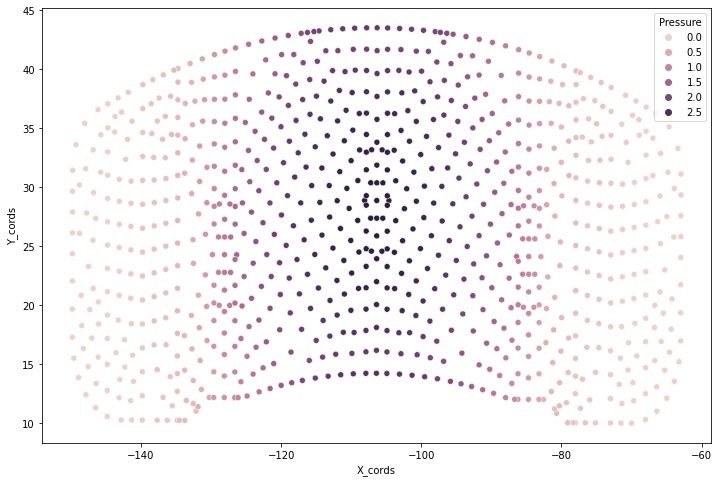

In [251]:
plt.figure(figsize=(12,8))
sns.scatterplot(results['X_cords'],results['Y_cords'],hue=results["Pressure"])

In [252]:
x = results["X_cords"]
y = results["Y_cords"]
z = results["Pressure"]

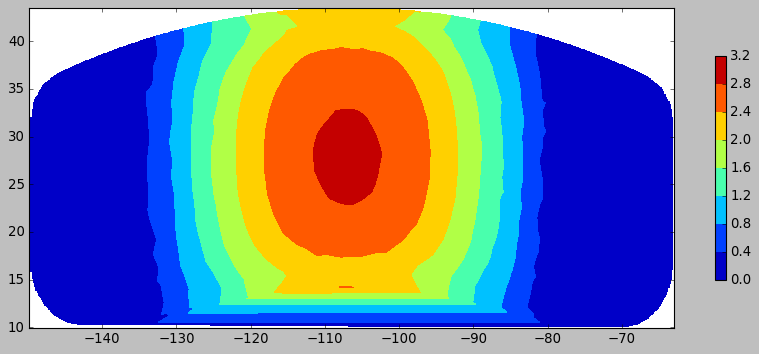

In [ ]:
from scipy.interpolate import griddata
def plot_contour(x,y,z,resolution = 500,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

X,Y,Z = plot_contour(x,y,z,resolution = 500,contour_method='linear')

with plt.style.context("classic"):
    
    fig, ax = plt.subplots(figsize=(13,5))
    
    plt.colorbar(ax.contourf(X,Y,Z),shrink=0.7)
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    #cbar = plt.colorbar(cs)